In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import accuracy_score


In [2]:
ds= pd.read_csv('./Dataset/heart.csv')         

In [3]:
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(ds.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [5]:
ds['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
ds.groupby('target').size()

target
0    138
1    165
dtype: int64

In [7]:
ds.shape

(303, 14)

In [8]:
ds.size

4242

In [9]:
ds.describe() #showing the statistical data of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
ds.info() #checking for null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#Visualization

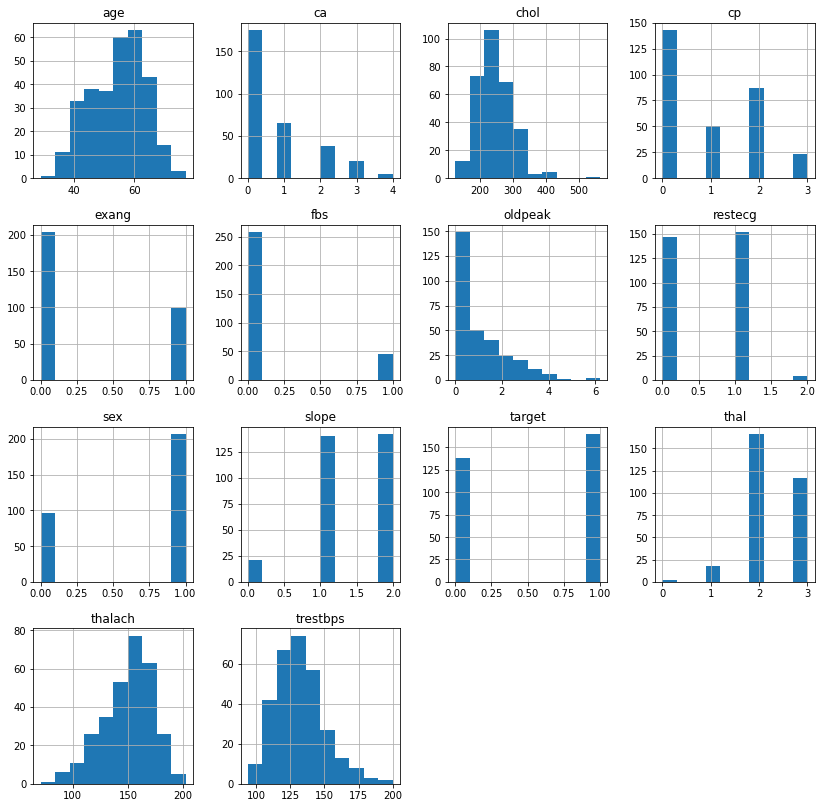

In [12]:
ds.hist(figsize=(14,14))#pandas visualization on top of matplotlib

plt.show()


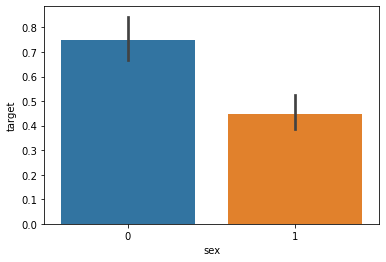

In [13]:
sns.barplot(ds['sex'],ds['target'])
plt.show()

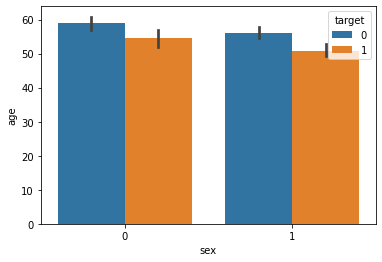

In [14]:
sns.barplot(ds['sex'],ds['age'],hue=ds['target'])
plt.show()

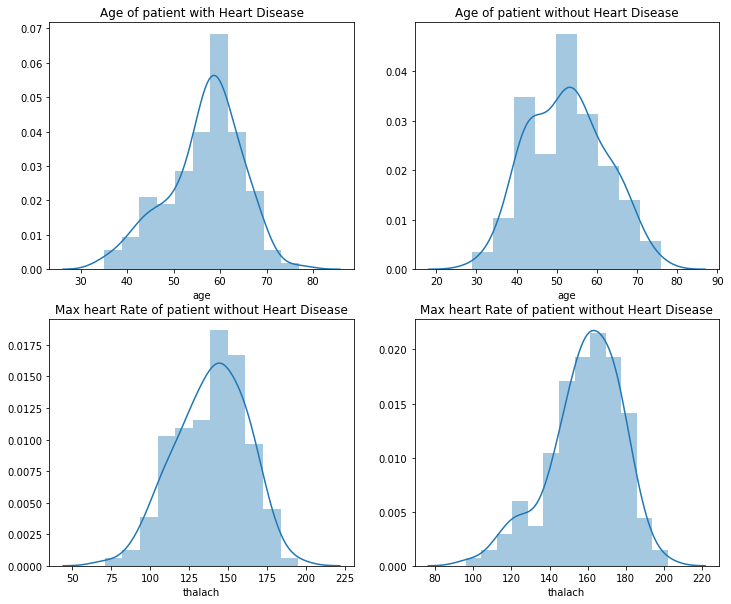

In [15]:
#create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(ds[ds['target']==0].age)
plt.title('Age of patient with Heart Disease')

plt.subplot(222)
sns.distplot(ds[ds['target']==1].age)
plt.title('Age of patient without Heart Disease')

plt.subplot(223)
sns.distplot(ds[ds['target']==0].thalach)
plt.title('Max heart Rate of patient without Heart Disease')

plt.subplot(224)
sns.distplot(ds[ds['target']==1].thalach)
plt.title('Max heart Rate of patient without Heart Disease')
plt.show()


In [16]:
#DATA preprocessing

In [17]:
X,Y=ds.loc[:,:'thal'],ds.loc[:,'target']

In [18]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
X.shape

(303, 13)

In [21]:
Y.shape

(303,)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X=ds.drop(['target'],axis=1)

In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10, test_size=0.3, shuffle=True)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [27]:
Y_train

49     1
171    0
223    0
58     1
154    1
      ..
156    1
123    1
15     1
125    1
265    0
Name: target, Length: 212, dtype: int64

In [28]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [29]:
Y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [30]:
print ("X_train_set shape: " + str(X_train.shape))
print ("Y_train_set shape: " + str(Y_train.shape))
print ("X_test_set shape: " + str(X_test.shape))
print ("Y_test_set shape: " + str(Y_test.shape))

X_train_set shape: (212, 13)
Y_train_set shape: (212,)
X_test_set shape: (91, 13)
Y_test_set shape: (91,)


In [31]:
#Using algorithms

In [32]:
#Decision Tree Classifier

In [33]:
category=['No Heart Disease', 'Yes You have heart disease']

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier() 
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [35]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [36]:
accuracy_dt         #accuracy of Decision Tree

75.82417582417582

In [37]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.758


In [38]:
Y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [39]:
#predicting if there is heart Disease or not

In [40]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [41]:
X_dt=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_dt_prediction=dt.predict(X_dt)

In [42]:
X_dt_prediction[0]

1

In [43]:
print(category[int(X_dt_prediction[0])])

Yes You have heart disease


In [44]:
#Feature importances in Decision Tree

In [45]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.07993869 0.0283698  0.32392476 0.07195982 0.08976649 0.
 0.         0.09366701 0.04724994 0.07265057 0.08271823 0.10975468
 0.        ]


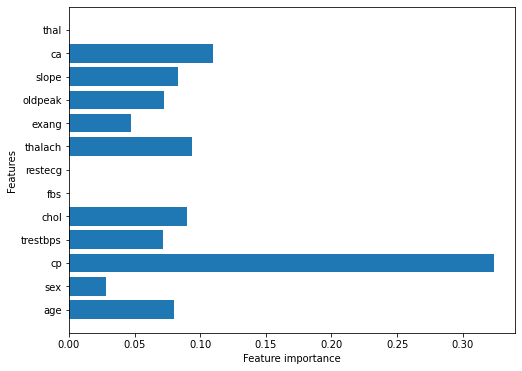

In [46]:
def plot_feature_importances_heart_disease(model):
    plt.figure(figsize=(8,6))
    n_features=13
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1,n_features)
    
    
plot_feature_importances_heart_disease(dt)
plt.savefig('feature_importance')

In [47]:
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [48]:
#KNN algorithm

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
ssc=StandardScaler().fit(X_train) #Scaling down the data by the use of standard scaler for KNN algorithm
X_train_std=ssc.transform(X_train)
X_test_std=ssc.transform(X_test)

In [51]:
X_test_std

array([[ 0.18111199, -1.35154233, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132],
       [ 0.39865161,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [ 1.05127045,  0.73989544,  0.97963397, ..., -0.6067969 ,
        -0.67157686,  1.22676132],
       ...,
       [ 0.2898818 ,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [-0.25396724,  0.73989544,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 0.61619122,  0.73989544, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132]])

In [52]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,Y_train)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(Y_test, prediction_knn)
    scores_list.append(accuracy_score(Y_test, prediction_knn))

In [53]:
scores

{1: 0.7692307692307693,
 2: 0.8241758241758241,
 3: 0.8241758241758241,
 4: 0.8461538461538461,
 5: 0.8131868131868132,
 6: 0.8131868131868132,
 7: 0.8131868131868132,
 8: 0.8351648351648352,
 9: 0.7802197802197802,
 10: 0.7912087912087912,
 11: 0.7912087912087912,
 12: 0.7802197802197802,
 13: 0.7912087912087912,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7692307692307693,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

In [54]:
scores_list

[0.7692307692307693,
 0.8241758241758241,
 0.8241758241758241,
 0.8461538461538461,
 0.8131868131868132,
 0.8131868131868132,
 0.8131868131868132,
 0.8351648351648352,
 0.7802197802197802,
 0.7912087912087912,
 0.7912087912087912,
 0.7802197802197802,
 0.7912087912087912,
 0.8021978021978022,
 0.7802197802197802,
 0.7912087912087912,
 0.7802197802197802,
 0.7802197802197802,
 0.7692307692307693,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802]

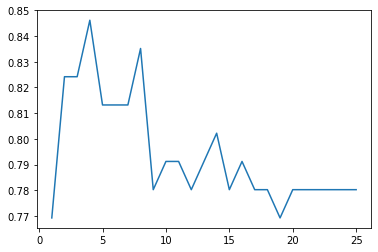

In [55]:
plt.plot(k_range,scores_list)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4) #since the best value of k was 4
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [57]:
prediction_knn=knn.predict(X_test_std)

In [58]:
accuracy_knn=accuracy_score(Y_test, prediction_knn)*100

In [59]:
accuracy_knn     #accuracy of KNN

84.61538461538461

In [60]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, Y_test)))

Accuracy on training set: 0.373
Accuracy on test set: 0.516


In [61]:
#predicting if there is heart Disease or not

In [62]:
X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_knn_std=ssc.transform(X_knn)
X_knn_prediction=dt.predict(X_knn)

In [63]:
X_knn_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [64]:
(X_knn_prediction[0])

1

In [65]:
print(category[int(X_knn_prediction[0])])

Yes You have heart disease


In [66]:
#Comparing the two algoritms

In [67]:
algorithms=['Decision Tree', 'KNN']
scores=[accuracy_dt,accuracy_knn]

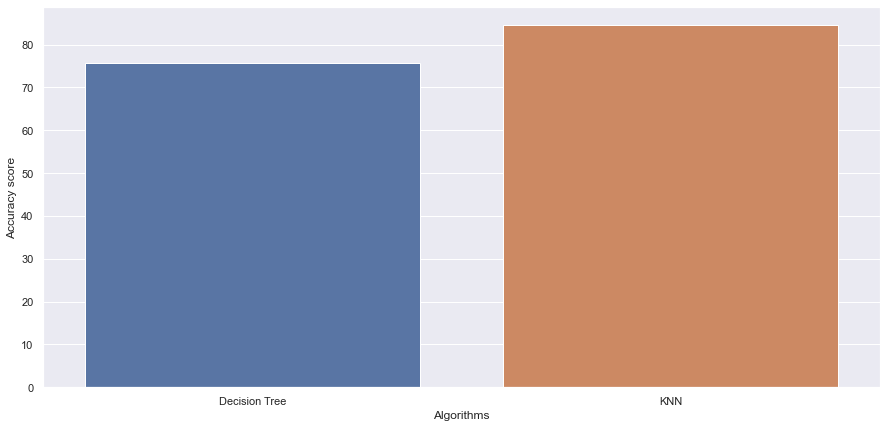

In [68]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)